<a href="https://colab.research.google.com/github/BhanuSrihridai/British-Airways/blob/Development/British_airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk


In [47]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=10
page_size=100

reviews=[]

for i in range(1,pages+1):

    print(f"Scraping page {i}")

    # Creating url from a page to collect data
    # url = https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100

    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")




Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [48]:
df = pd.DataFrame()
df["reviews"] = reviews
df.sample(10)

,reviews
247,✅ Trip Verified | BA shuttle service across t...
141,✅ Trip Verified | Busy day at LHR and flight ...
319,✅ Trip Verified | Having been promised help t...
514,✅ Trip Verified | No check in staff for Econom...
855,✅ Trip Verified | Phoenix to Amsterdam via Lo...
19,✅ Trip Verified | The customer services (call ...
630,✅ Trip Verified | Hong Kong to London Heathrow...
563,✅ Trip Verified | Newcastle to London Heathrow...
92,✅ Trip Verified | I don't understand why Brit...
265,✅ Trip Verified | When I tried to check in on...


In [49]:
df.to_csv("C:\Data Science\Internship\British Airways\British Airways.csv")


In [50]:
df=pd.read_csv("British Airways.csv")

# **Data Cleaning**

**Checking for null values**

In [51]:
df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

**Removing the punctuation**

In [52]:
df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


<ipython-input-52-91d5aada4604>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


In [53]:
df["review_processed"]

0        Trip Verified    Booked online months ago an...
1        Trip Verified    The flight was on time  The...
2      Not Verified    Angry  disappointed  and unsat...
3        Trip Verified    As an infrequent flyer  Bri...
4      Not Verified    A totally unremarkable flight ...
                             ...                        
995      Trip Verified    San Francisco to London  Te...
996      Trip Verified    Heathrow to Vancouver  The ...
997      Trip Verified    London to Bucharest  First ...
998      Trip Verified    I forgot I had purchased a ...
999      Trip Verified    When the passenger in front...
Name: review_processed, Length: 1000, dtype: object

**Creating a column for trip verifcation**

In [54]:
# def trip_verification(row):

#   words = row.split()
#   for word in words :
#     first_two_words=' '.join(words[:2])
#     return first_two_words

In [55]:
# df['Trip Verification'] = df['review_processed'].apply(lambda row: trip_verification(row))
# df.head()

Or simply we can use join method as below

In [56]:
df['Trip Verification'] = df['review_processed'].apply(lambda row: ' '.join(row.split()[:2]) )
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join(row.split()[2:]) )    # Removing verification tag from the review
df.head()

,Unnamed: 0,reviews,review_processed,Trip Verification
0,0,✅ Trip Verified | Booked online months ago an...,Booked online months ago and the only hitch wa...,Trip Verified
1,1,✅ Trip Verified | The flight was on time. The...,The flight was on time The crew were polite It...,Trip Verified
2,2,"Not Verified | Angry, disappointed, and unsat...",Angry disappointed and unsatisfied My route wa...,Not Verified
3,3,"✅ Trip Verified | As an infrequent flyer, Bri...",As an infrequent flyer British Airways was alw...,Trip Verified
4,4,"Not Verified | A totally unremarkable flight,...",A totally unremarkable flight on time as comfo...,Not Verified


In [57]:
cols=['Unnamed: 0','reviews']
df=df.drop(columns=cols)
df.head()

,review_processed,Trip Verification
0,Booked online months ago and the only hitch wa...,Trip Verified
1,The flight was on time The crew were polite It...,Trip Verified
2,Angry disappointed and unsatisfied My route wa...,Not Verified
3,As an infrequent flyer British Airways was alw...,Trip Verified
4,A totally unremarkable flight on time as comfo...,Not Verified


**Replacing the shorter words with space**

In [71]:
df['review_processed']=df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word.strip())>2]))
df['review_processed']


0      book online month ago hitch replacement aircra...
1      time crew polite story outward find europe gen...
2      angry disappoint unsatisfied route london atla...
3      infrequent flyer always first choice reassuran...
4      totally unremarkable time comfortable european...
                             ...                        
995    san francisco london terrible service food cra...
996    heathrow vancouver seat book give take month r...
997    london bucharest first class ground staff air ...
998    forgot purchase hand baggage fare airport char...
999    passenger front reclines seat make difficult o...
Name: review_processed, Length: 1000, dtype: object

In [76]:
df['review_processed'][168]


'lhr check quick first wing quickly security first lounge quiet change reasonably good breakfast buffet available bring back highlife magazine lounge seem use covid scrap magazine use offer part endless cost cut toilet lounge disgust ever clean frequently visit year date public washrooms good cleaner board usual muddle mess two gate staff appear clue endless announcement gate full requesting passenger check bag less full onboard good welcome captain leave gate min late breakfast choice fair standard hot towel even packet towel offer club europe another part relentless cost cut mind fare proportionately lot high pre covid cabin staff service perfunctory best scrap recognition gold oneworld emerald member clear proof really care breakfast tray clear min sign staff stay front galley rest pay hour wifi dropped connection next min sad note staff service ryanair pro active nowadays priority tag suitcase come nearly last malaga standard business class baggage handle waste money club europe st

**Converting all words into lower case**

In [59]:
df['review_processed']=[row.lower() for row in df['review_processed']]
df['review_processed']

0      booked online months ago and the only hitch wa...
1      the flight was time the crew were polite was t...
2      angry disappointed and unsatisfied route was f...
3      infrequent flyer british airways was always fi...
4      totally unremarkable flight time comfortable e...
                             ...                        
995    san francisco london terrible service and food...
996    heathrow vancouver the seats booked not given ...
997    london bucharest first class ground staff but ...
998    forgot had purchased hand baggage only fare th...
999    when the passenger front reclines his her seat...
Name: review_processed, Length: 1000, dtype: object

**Removing the stop words**

In [77]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set
stop_words

add_words = ['british', 'airway','airways', 'flight', 'get', 'airline', 'fly'] # Adding our custom stop words
stop_words.extend(add_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
def remove_stopwords(rev):
    # input : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [80]:
review_tokenized = word_tokenize(df['review_processed'][350])

rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])

rev_new

'cancel never book another refunded quarter spend despite covid guarantee book onto april 29th 2022 hong kong london cancel look rebooking later date covid ticket flexibility assurance find include october opt refund think full refund refund pay call service centre explanation fathom could cancel available full refund phone call take minute talk customer service thats frustration begin customer service people adamant full refund give ask wait escalate case month later phone call later thats hour wait phone finally refund little total pay would seem refund increment would call customer service take round circle frustrated give instead call enquire via website answer full refund cancel book neither fault decide stop another month wait reason give email thanks contact claim compensation sorry necessary cancel heathrow april 2022 claim refuse ba0032 cancel non payable commercial reason request would advise kindly touch customer support team know status refund look support team take reasona

In [63]:
df['review_processed']=[remove_stopwords(r) for r in df['review_processed']]

In [81]:
df['review_processed'].head()

0    book online month ago hitch replacement aircra...
1    time crew polite story outward find europe gen...
2    angry disappoint unsatisfied route london atla...
3    infrequent flyer always first choice reassuran...
4    totally unremarkable time comfortable european...
Name: review_processed, dtype: object

**Lemmatisation**

In [65]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [66]:
lemmatiser = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ

  elif nltk_tag.startswith('V'):
    return wordnet.VERB

  elif nltk_tag.startswith('N'):
      return wordnet.NOUN

  elif nltk_tag.startswith('R'):
      return wordnet.ADV
  else:
      return None


In [67]:
def lemmatize_sentence(sentence):

  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

  lemmatized_sentence = []

  for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatiser.lemmatize(word, tag))

  return " ".join(lemmatized_sentence)

df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))


In [82]:
df['review_processed'][0]

'book online month ago hitch replacement aircraft mean choose seat different inform prior departure could amend bag drop man smooth suspect man fault shuttle board slow delay meaning rush lhr cpt full leave less time cabin clean expect sufficient leg arm room plus little perks drink complaint seat actually recline far staff good first hour service especially george food quite tasty one option load breakfast also quite tasty land time ointment case arrive late carousel later notice break likely cpt pleasant surprise'

**Plotting frequent words**


<Axes: xlabel='count', ylabel='word'>

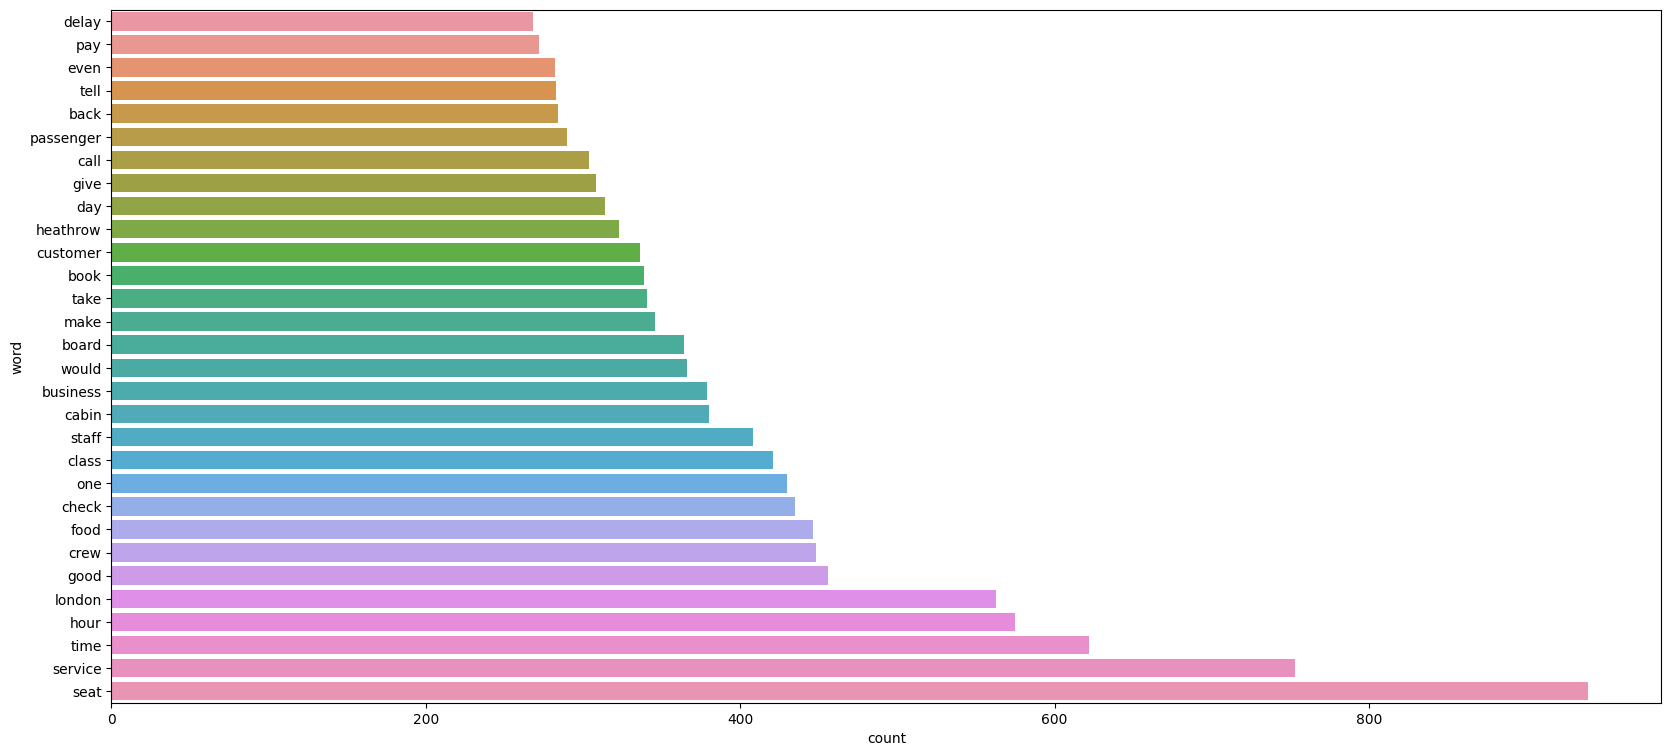

In [83]:
import seaborn as sns
from nltk import FreqDist
import matplotlib.pyplot as plt

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30)

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,9))
# ax = plt.barh(words_df['word'], width = words_df['count'])
# plt.show()

sns.barplot(y=words_df['word'],x=words_df['count'])


**Word Cloud**

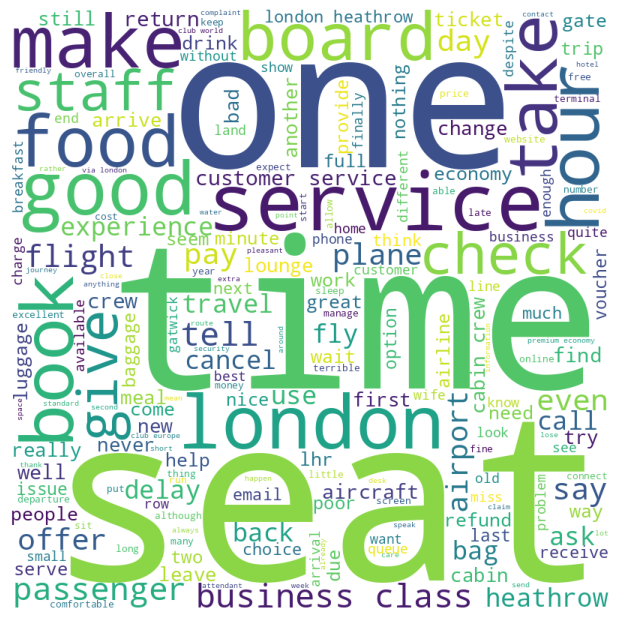

In [84]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['review_processed']])

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **Sentiment Analysis with VADER**

VADER stands for "Valence Aware Dictionary and sEntiment Reasoner." It is a pre-built, rule-based sentiment analysis tool designed for the English language. VADER is specifically tuned to analyze and interpret sentiments in text data, especially in the context of social media.

Developed by researchers at the Georgia Institute of Technology, VADER is designed to handle the challenges of sentiment analysis in text, such as handling sentiment-laden words, slang, negations, and context. VADER assigns a polarity score to a given text, indicating whether the sentiment is positive, negative, or neutral. The tool also provides an overall compound score that combines these individual scores.

In [86]:
! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [98]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

# Method to find the sentiment score
def sentiment_Score(review):
  scores=analyser.polarity_scores(review)
  return scores['compound']

# Method to find the sentiment
def sentiment_Analysis(score):
  if score >= 0.5:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'neutral'

In [100]:
df['Sentiment_score']=df['review_processed'].apply(sentiment_Score)

In [102]:
df['Sentiment']=df['Sentiment_score'].apply(lambda row: sentiment_Analysis(row))

In [104]:
df.sample(10)

,review_processed,Trip Verification,Sentiment_score,Sentiment
681,london johannesburg gate lounge rather civilis...,Not Verified,0.6124,positive
805,london heathrow sofia check online straight ba...,Not Verified,0.9650,positive
554,direct london lahore travel nightmare milk son...,Not Verified,0.7430,positive
108,cairo hour considers short haul everyone cram ...,Not Verified,-0.8728,negative
245,definitely recommend especially business class...,Trip Verified,0.8519,positive
796,london heathrow inverness previously write rev...,Trip Verified,-0.8849,negative
215,board decently organise a380 still rather stra...,Trip Verified,0.8376,positive
451,past year flown twice end exact predicament wa...,Not Verified,0.0772,neutral
518,year year service route washington london beco...,Trip Verified,-0.9300,negative
692,london vancouver use aircraft route many year ...,Trip Verified,0.8422,positive


In [106]:
df['Sentiment'].value_counts()

positive    475
negative    416
neutral     109
Name: Sentiment, dtype: int64

**Visulaising the sentiment**

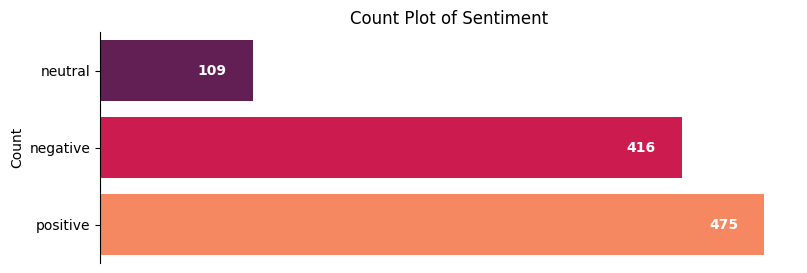

In [116]:
plt.figure(figsize=(9,3))

axes=sns.countplot(data=df,y='Sentiment',width=0.8,saturation=1,palette='rocket')
plt.title('Count Plot of Sentiment')
plt.ylabel('Count')

axes.bar_label(axes.containers[0],color='white',padding=-40,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
axes.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
axes.xaxis.set_visible(False)                                                                     # Sets visibility of x-axis to False so that x-axis doesn't visible